In [4]:
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
df = pandas.read_csv('../datasets/bike.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Linear model

In [7]:
#seaborn.scatterplot(data = df, x = 'temp', y = 'cnt')

1326.636429141964
[6451.7727251]


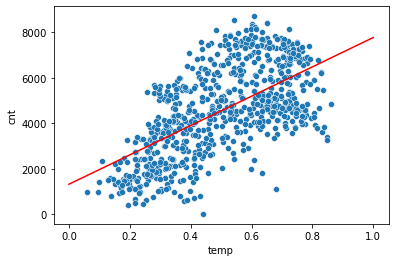

In [8]:
n = len(df.values)
x = df['temp'].values
y = df['cnt'].values
x = np.reshape(x, (n, 1))
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(xTrain, yTrain)
print(model.intercept_)
print(model.coef_)

m = model.coef_[0]
b = model.intercept_

plt.figure()
seaborn.scatterplot(data = df, x = 'temp', y = 'cnt')
plt.plot([0, 1], [0*m + b, 1*m + b], c = 'r')
plt.show()

# Quadratic model

<AxesSubplot:xlabel='mnth', ylabel='temp'>

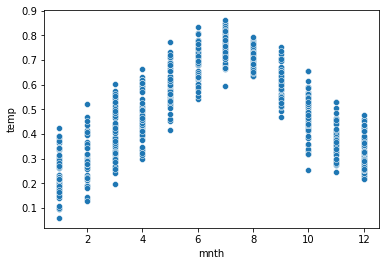

In [9]:
seaborn.scatterplot(data = df, x = 'mnth', y = 'temp')

-0.03534576175926246
[ 0.20408329 -0.01476863]


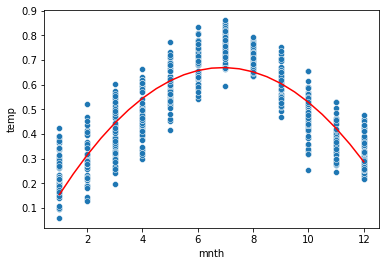

In [10]:
n = len(df.values)
x = df['mnth'].values
y = df['temp'].values
x = np.reshape(x, (n, 1))

x = np.concatenate((x, x**2), axis = 1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(xTrain, yTrain)
print(model.intercept_)
print(model.coef_)

b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]

lx = np.arange(1, 12.5, 0.5)
ly = b0 + b1*lx + b2*lx**2

plt.figure()
seaborn.scatterplot(data = df, x = 'mnth', y = 'temp')
plt.plot(lx, ly, c = 'r')
plt.show()

# N Features

R2: 0.46968283675764666
MAE: 1261.7429995217196
3520.0537222638777
[  482.44718251   -23.73641272    45.91412218  5688.6841568
 -3359.27616739 -4812.33631479]


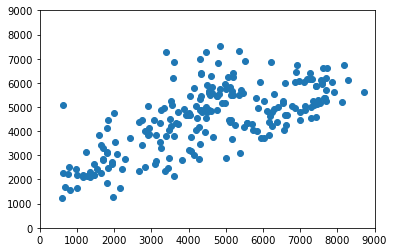

In [20]:
features = ['season', 'mnth', 'weekday', 'temp', 'hum', 'windspeed']
n = len(df.values)
x = df[features].values
y = df['cnt'].values

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

print('R2:', r2_score(yTest, yPred))
print('MAE:', mean_absolute_error(yTest, yPred))
print(model.intercept_)
print(model.coef_)

plt.figure()
plt.scatter(yTest, yPred)
plt.xlim([0, 9000])
plt.ylim([0, 9000])
plt.show()

# Quadratic N Features

R2: 0.6046515758762948
MAE: 1124.4132473915165
-3333.12024953966
[ 1.07352542e+03 -3.19371457e+02  8.44185162e+01  2.55622167e+04
  6.86363722e+03 -4.03990144e+03 -1.23294610e+02  1.97901045e+01
 -6.54810810e+00 -1.96424863e+04 -8.94603904e+03 -2.45954276e+03]


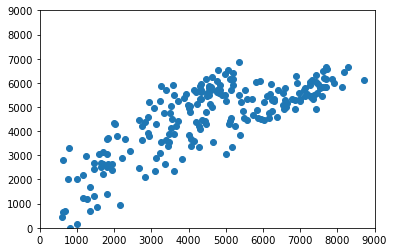

In [22]:
features = ['season', 'mnth', 'weekday', 'temp', 'hum', 'windspeed']
n = len(df.values)
x = df[features].values
y = df['cnt'].values

x = np.concatenate((x, x**2), axis = 1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

print('R2:', r2_score(yTest, yPred))
print('MAE:', mean_absolute_error(yTest, yPred))
print(model.intercept_)
print(model.coef_)

plt.figure()
plt.scatter(yTest, yPred)
plt.xlim([0, 9000])
plt.ylim([0, 9000])
plt.show()

R2 linear: 0.46968283675764666
R2 quadratic: 0.6046515758762948


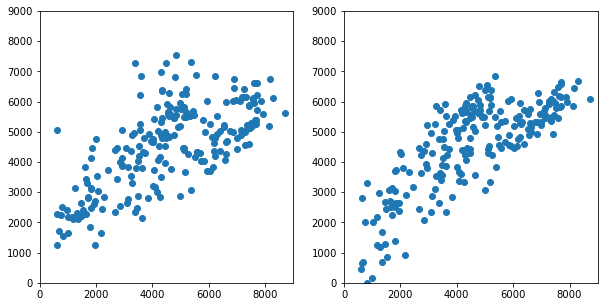

In [24]:
features = ['season', 'mnth', 'weekday', 'temp', 'hum', 'windspeed']
n = len(df.values)
x = df[features].values
y = df['cnt'].values

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

xxTrain = np.concatenate((xTrain, xTrain**2), axis = 1)
xxTest = np.concatenate((xTest, xTest**2), axis = 1)

model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

modelQ = LinearRegression()
modelQ.fit(xxTrain, yTrain)
yPredQ = modelQ.predict(xxTest)

print('R2 linear:', r2_score(yTest, yPred))
print('R2 quadratic:', r2_score(yTest, yPredQ))

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.scatter(yTest, yPred)
plt.xlim([0, 9000])
plt.ylim([0, 9000])
plt.subplot(1, 2, 2)
plt.scatter(yTest, yPredQ)
plt.xlim([0, 9000])
plt.ylim([0, 9000])
plt.show()